In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [119]:
data = pd.read_csv('real_estate.csv')
data.head()

,No,Transactiondate,House_age,Dist_nearest,Num_stores,Latitude,Longitude,House_ppa
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [120]:
dataframe = data[['House_age', 'Num_stores', 'Dist_nearest', 'Latitude', 'Longitude', 'House_ppa' ]]
dataframe.head(10)

,House_age,Num_stores,Dist_nearest,Latitude,Longitude,House_ppa
0,32.0,10,84.87882,24.98298,121.54024,37.9
1,19.5,9,306.59470,24.98034,121.53951,42.2
2,13.3,5,561.98450,24.98746,121.54391,47.3
3,13.3,5,561.98450,24.98746,121.54391,54.8
4,5.0,5,390.56840,24.97937,121.54245,43.1
5,7.1,3,2175.03000,24.96305,121.51254,32.1
6,34.5,7,623.47310,24.97933,121.53642,40.3
7,20.3,6,287.60250,24.98042,121.54228,46.7
8,31.7,1,5512.03800,24.95095,121.48458,18.8
9,17.9,3,1783.18000,24.96731,121.51486,22.1


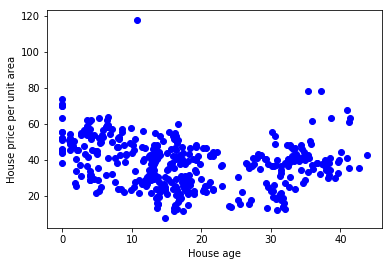

In [121]:
plt.scatter(dataframe.House_age, dataframe.House_ppa, color='blue')
plt.xlabel("House age")
plt.ylabel("House price per unit area")
plt.show()

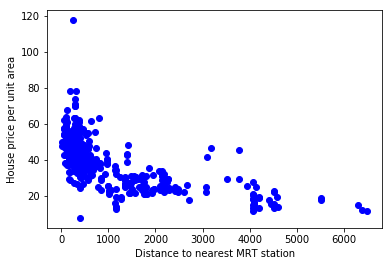

In [122]:
plt.scatter(dataframe.Dist_nearest, dataframe.House_ppa, color='blue')
plt.xlabel("Distance to nearest MRT station")
plt.ylabel("House price per unit area")
plt.show()

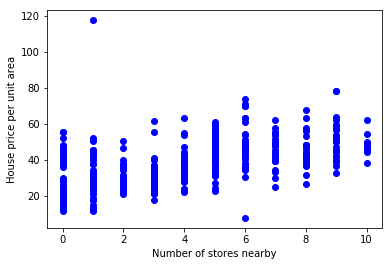

In [123]:
plt.scatter(dataframe.Num_stores, dataframe.House_ppa, color='blue')
plt.xlabel("Number of stores nearby")
plt.ylabel("House price per unit area")
plt.show()

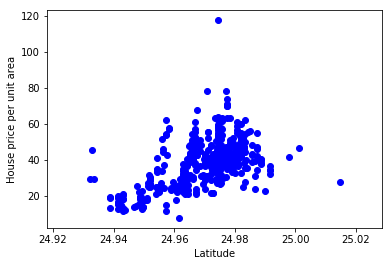

In [124]:
plt.scatter(dataframe.Latitude, dataframe.House_ppa, color='blue')
plt.xlabel("Latitude")
plt.ylabel("House price per unit area")
plt.show()

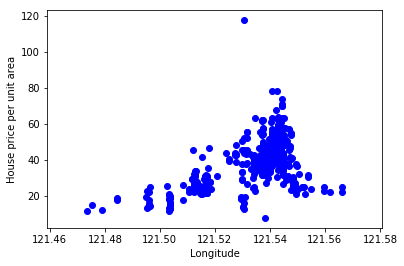

In [125]:
plt.scatter(dataframe.Longitude, dataframe.House_ppa, color='blue')
plt.xlabel("Longitude")
plt.ylabel("House price per unit area")
plt.show()

In [126]:
mask = np.random.rand(len(data)) < 0.8
train = dataframe[mask]
test = dataframe[~mask]

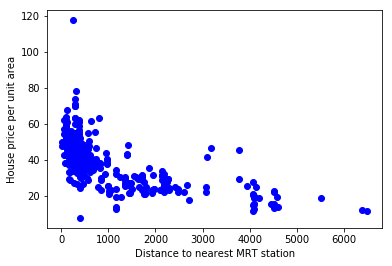

In [127]:
plt.scatter(train.Dist_nearest, train.House_ppa, color='blue')
plt.xlabel("Distance to nearest MRT station")
plt.ylabel("House price per unit area")
plt.show()

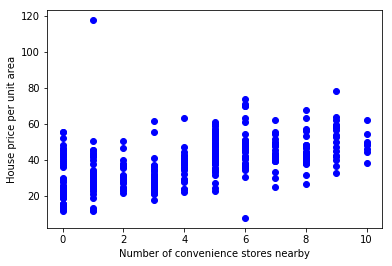

In [128]:
plt.scatter(train.Num_stores, train.House_ppa, color='blue')
plt.xlabel("Number of convenience stores nearby")
plt.ylabel("House price per unit area")
plt.show()

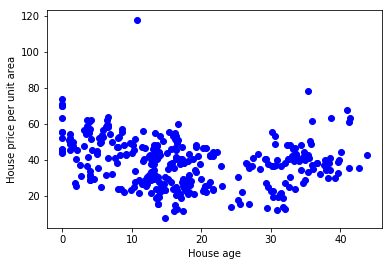

In [129]:
plt.scatter(train.House_age, train.House_ppa, color='blue')
plt.xlabel("House age")
plt.ylabel("House price per unit area")
plt.show()

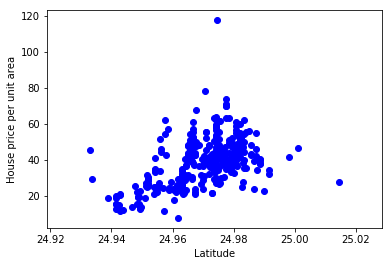

In [130]:
plt.scatter(train.Latitude, train.House_ppa, color='blue')
plt.xlabel("Latitude")
plt.ylabel("House price per unit area")
plt.show()

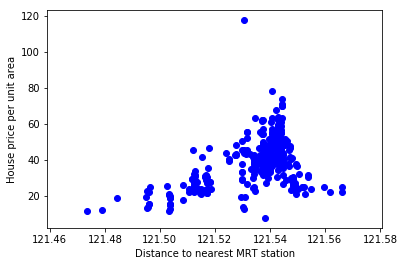

In [131]:
plt.scatter(train.Longitude, train.House_ppa, color='blue')
plt.xlabel("Distance to nearest MRT station")
plt.ylabel("House price per unit area")
plt.show()

In [132]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Dist_nearest', 'Num_stores', 'House_age', 'Latitude', 'Longitude']])
y = np.asanyarray(train[['House_ppa']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[-4.56885214e-03  1.03476641e+00 -2.72139859e-01  2.51317208e+02
  -1.84710242e+01]]


In [133]:
y_hat = regr.predict(test[['Dist_nearest', 'Num_stores', 'House_age', 'Latitude', 'Longitude']])
x = np.asanyarray(test[['Dist_nearest', 'Num_stores', 'House_age', 'Latitude', 'Longitude']])
y = np.asanyarray(test[['House_ppa']])
print("Residual sum of squares: %.2f" %np.mean((y_hat - y)**2))

print('Variance score: %.2f' %regr.score(x, y))

Residual sum of squares: 55.85
Variance score: 0.70
